#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [4]:
pip install opencv-python numpy matplotlib scipy scikit-learn

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
# Reading the image
img = cv2.imread(r'media/Plaksha_Faculty.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image. 
# Change the parameters for better detection as needed.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

print("Total number of faces detected: ", len(faces_rect))

# Define the text and font parameters
text = ""                               ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX         # Font type
font_scale = 1                          # Font scale factor
font_color = (0, 0, 255)                # Text color in BGR (red)
font_thickness = 2                      # Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    print(x, y, w, h)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Put the text slightly above or below the rectangle
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)

# Display the image. Window title shows total detected faces
cv2.imshow("Total number of face detected are " + str(len(faces_rect)), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Total number of faces detected:  30
409 277 28 28
812 274 34 34
570 426 39 39
632 328 34 34
893 327 36 36
464 296 33 33
322 263 33 33
500 266 30 30
654 265 31 31
477 407 36 36
819 337 33 33
262 410 41 41
892 267 31 31
1003 273 32 32
925 353 38 38
732 278 33 33
1095 361 33 33
675 413 37 37
1072 410 42 42
975 416 40 40
870 424 35 35
1019 348 40 40
364 424 40 40
359 300 33 33
547 300 34 34
158 389 42 42
777 390 45 45
262 275 43 43
576 253 32 32
731 316 40 40


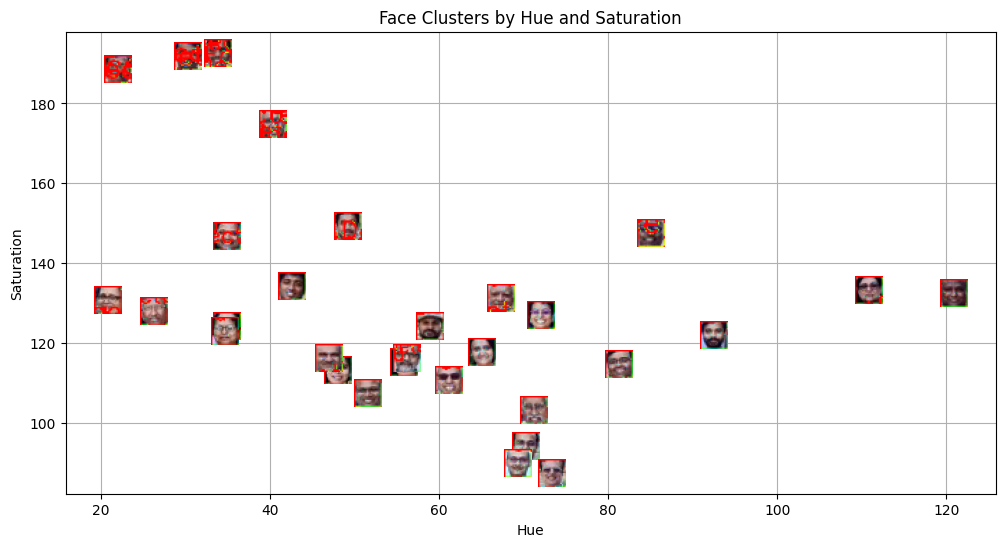

In [5]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Convert the original BGR image to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Lists to hold hue-saturation values and face images
hue_saturation = []
face_images = []

for (x, y, w, h) in faces_rect:
    # Extract the face region from the HSV image
    face = img_hsv[y:y+h, x:x+w]
    
    # Compute the mean hue and saturation
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    
    hue_saturation.append((hue, saturation))
    face_images.append(face)

# Convert hue_saturation to a NumPy array
hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on the hue_saturation array
# Adjust n_clusters to however many clusters you want
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the faces, using the hue_saturation coordinates
for i, (x, y, w, h) in enumerate(faces_rect):
    # Convert each face from HSV to RGB (for correct color in matplotlib), resize for the annotation image
    face_rgb = cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB)
    
    # Create an offset image and annotation box
    im = OffsetImage(face_rgb, zoom=1.0)  # zoom can be adjusted
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), 
                        frameon=False, pad=0)
    ax.add_artist(ab)
    
    # Also plot a small marker at the hue-saturation point
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'bo')

# Label the axes
plt.xlabel("Hue")
plt.ylabel("Saturation")

# Set a title
plt.title("Face Clusters by Hue and Saturation")

# Add a grid
plt.grid(True)

# Display the final plot
plt.show()


In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(______________________________________________________________________________)


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(_______________________________________________________________________________)

# Calculate and plot centroids
centroid_0 = _________________________________________
centroid_1 = _________________________________________

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(____________________________________________________________________________________)
plt.scatter(____________________________________________________________________________________)

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## Show the plot


In [ ]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = _____________________________________________
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = ___________________________________________________________________________________________
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow(_____________________________________________________)
cv2.waitKey(0)
cv2.destroyAllWindows()      

In [ ]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = __________________________________________________

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = ____________________________________________________
template_saturation = _________________________________________________

# Predict the cluster label for the template image and store it in template_label
template_label = _________________________________________________________

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
## Put y label
## Put title
## Add grid
## show plot

In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(_______________________________________________________________________________)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(________________________________________________________________________________)

# Calculate and plot centroids for both the clusters
centroid_0 = __________________________________________________
centroid_1 = __________________________________________________
plt.scatter(____________________________________________________________ _________________) ## plot for centroid 0
plt.scatter(_____________________________________________________________________________)  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 